### feature 전처리 ver2
* 행정동 별 입지특성 vs 매장 반경 500m 입지특성
* 인구 특성은 동일함 (유동인구비율 = 활동인구/거주인구)

### clustering ver2
* 입지특성으로 cluster 1차 진행 후 인구 특성으로 2차 cluster 진행

In [1]:
# import module
import pandas as pd

## Load Data
# 깐부치킨 매장별 행정동 데이터 Load
store_dong = pd.read_csv("../resources/processedData/깐부치킨_매장좌표_행정동 추가.csv", encoding="utf8")

# 깐부치킨 거래데이터 Load
sales = pd.read_csv("../resources/processedData/깐부치킨_거래데이터.csv", encoding="utf8")

# 행정동별 면적 데이터 Load
dong_area = pd.read_csv("../resources/processedData/강남구_행정동별_면적.csv", encoding="utf8")

# 행정동별 인구 feature Load
people = pd.read_csv("../resources/processedData/강남구 행정동별 인구 feature.csv", encoding="utf8")

# 행정동별 토지 피복 비율 데이터 Load
dong_landscape = pd.read_csv("../resources/processedData/입지특성_행정동별_토지피복.csv", encoding="utf8")

# 매장별 반경 500m 토지 피복 비율 데이터 Load
store_landscape = pd.read_csv("../resources/processedData/입지특성_매장별 매장반경 500M 토지피복.csv", encoding="utf8")

In [2]:
store_landscape

,매장명,상업지역,문화체육휴양시설,주거지역
0,(주)깐부 청담본점,0.401674,0.020672,0.577653
1,(주)깐부치킨(세곡점),0.163217,0.057290,0.779494
2,깐부치킨 대치역점,0.187485,0.082595,0.729920
3,깐부치킨 신사가로수점,0.320944,0.054508,0.624547
4,깐부치킨 역삼본점,0.396986,0.601307,0.001708
5,깐부치킨(강남구청역1번출구점),0.276475,0.021761,0.701764
6,깐부치킨(강남구청역3번출구점),0.336520,0.030976,0.632504
7,깐부치킨(강남세브란스점),0.285410,0.029224,0.685366
8,깐부치킨(강남역플래티넘점),0.934253,0.027802,0.037945
9,깐부치킨(개포점),0.087827,0.161833,0.750340


In [3]:
# 매장별 행정동 추출
store_dong
dong_list = list(store_dong["행정동"].unique())
dong_list

# 매장 이름 추출
store_list = list(store_dong["매장명"])
store_list

['깐부치킨(청담자이점)',
 '(주)깐부 청담본점',
 '깐부치킨(일원점)',
 '깐부치킨(역삼디오빌점)',
 '깐부치킨(강남세브란스점)',
 '깐부치킨(역삼초교점)',
 '깐부치킨(역삼GS타워점)',
 '깐부치킨 역삼본점',
 '깐부치킨(역삼럭키점)',
 '깐부치킨(강남역플래티넘점)',
 '깐부치킨(선릉역점)',
 '깐부치킨 신사가로수점',
 '깐부치킨(신사역점)',
 '깐부치킨(압구정한강고수부지)',
 '깐부치킨(압구정현대백화점)',
 '깐부치킨(수서역점)',
 '깐부치킨(청담1호점)',
 '(주)깐부치킨(세곡점)',
 '깐부치킨(강남구청역1번출구점)',
 '깐부치킨(선정릉역점)',
 '깐부치킨(삼성1동점)',
 '깐부치킨(삼성점)',
 '깐부치킨(한티점)',
 '깐부치킨(선릉역1번출구점)',
 '깐부치킨(대치사거리점)',
 '깐부치킨(삼성역점)',
 '깐부치킨(은마아파트점)',
 '깐부치킨 대치역점',
 '깐부치킨(도산사거리점)',
 '깐부치킨(강남구청역3번출구점)',
 '깐부치킨(학동역점)',
 '깐부치킨(논현역점)',
 '깐부치킨(개포점)']

In [4]:
sales

,매장코드,매장명,영업일자,영수증번호,결제일시,테이블번호,총판매금액,소분류명,상품명,상품코드,판매수량,판매단가
0,S23991,깐부치킨(강남구청역1번출구점),20190202,6,20190202190027,포장1,2000,SIDE MENU,코울슬러,48,1,2000
1,S23991,깐부치킨(강남구청역1번출구점),20190204,14,20190204201731,포장1,19000,SIDE MENU,골뱅이,8,1,19000
2,S23991,깐부치킨(강남구청역1번출구점),20190201,2,20190201175536,포장1,19000,SIDE MENU,골뱅이,8,1,19000
3,S23991,깐부치킨(강남구청역1번출구점),20190201,7,20190201192707,포장1,11000,SIDE MENU,웨지포테이토,12,1,11000
4,S23991,깐부치킨(강남구청역1번출구점),20190203,1,20190203174823,포장1,19000,MAIN MENU,마늘간장,3496,1,19000
...,...,...,...,...,...,...,...,...,...,...,...,...
83572,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,19000,SIDE MENU,골뱅이,8,1,19000
83573,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,500,EXTRA MENU,소스추가,492,1,500
83574,U06529,깐부치킨(역삼초교점),20190226,10,20190227025816,1,500,EXTRA MENU,소스추가,492,1,500
83575,U06529,깐부치킨(역삼초교점),20190228,22,20190301013814,1,500,EXTRA MENU,포장무,101,1,500


In [5]:
## feature 뽑기
dong_feature = pd.DataFrame(columns=["행정동","면적(km^2)","인구수","유동인구비율","동_문화·체육·휴양시설","동_상업지역","동_주거지역"])
store_feature = pd.DataFrame(columns=["매장명","행정동","인구당매출","유동인구비율","점포_문화·체육·휴양시설","점포_상업지역","점포_주거지역"])

# dong feature 뽑기
for name in dong_list:
    num = people[people["행정동"]==name]["인구수"].values[0]
    ratio = people[people["행정동"]==name]["유동인구비율"].values[0]
    area = dong_area[dong_area["행정동"]==name]["면적(km^2)"].values[0]
    ls1 = dong_landscape[dong_landscape["행정동"] == name]["문화·체육·휴양시설"].values[0]
    ls2 = dong_landscape[dong_landscape["행정동"] == name]["상업지역"].values[0]
    ls3 = dong_landscape[dong_landscape["행정동"] == name]["주거지역"].values[0]

    dong_feature = dong_feature.append({"행정동":name, "면적(km^2)":area,"인구수":num, "유동인구비율":ratio,
                                        "동_문화·체육·휴양시설": ls1, "동_상업지역":ls2, "동_주거지역": ls3}, ignore_index=True)
    
# store feature 뽑기
for store in store_list:
    name = store_dong[store_dong["매장명"] == store]["행정동"].values[0]
    ratio = people[people["행정동"]==name]["유동인구비율"].values[0]
    sale = round(sales[sales["매장명"] == store]["총판매금액"].sum() / people[people["행정동"]==name]["인구수"].values[0], 3)
    ls1 = store_landscape[store_landscape["매장명"] == store]["문화체육휴양시설"].values[0]
    ls2 = store_landscape[store_landscape["매장명"] == store]["상업지역"].values[0]
    ls3 = store_landscape[store_landscape["매장명"] == store]["주거지역"].values[0]

    store_feature = store_feature.append({"매장명": store,"행정동":name, "인구당매출":sale, "유동인구비율":ratio,
                                        "점포_문화·체육·휴양시설": ls1, "점포_상업지역":ls2, "점포_주거지역": ls3}, ignore_index=True)

# 유동인구 min-max normalization
# geofeature["유동인구비율(0-1)"] = (geofeature["유동인구비율"] - min(geofeature["유동인구비율"])) / (max(geofeature["유동인구비율"]) - min(geofeature["유동인구비율"]))

In [6]:
# 데이터 확인
dong_feature

,행정동,면적(km^2),인구수,유동인구비율,동_문화·체육·휴양시설,동_상업지역,동_주거지역
0,청담동,2.45,30014,1.42,0.045404,0.521318,0.433278
1,일원1동,0.92,16806,1.11,0.140781,0.243868,0.615351
2,역삼2동,1.15,36560,1.36,0.031786,0.471216,0.496998
3,역삼1동,2.65,35878,3.02,0.010595,0.611696,0.377709
4,신사동,1.89,17541,2.14,0.083859,0.568069,0.348072
5,수서동,1.43,16202,1.54,0.148923,0.341908,0.509169
6,세곡동,6.15,45160,0.94,0.081850,0.282990,0.635160
7,삼성2동,1.19,30291,1.29,0.024653,0.449894,0.525454
8,삼성1동,1.87,14811,3.02,0.024718,0.644026,0.331256
9,대치4동,0.79,20773,1.62,0.002936,0.511551,0.485514


In [7]:
# 데이터 확인
store_feature

,매장명,행정동,인구당매출,유동인구비율,점포_문화·체육·휴양시설,점포_상업지역,점포_주거지역
0,깐부치킨(청담자이점),청담동,1575.615,1.42,0.669139,0.307067,0.023793
1,(주)깐부 청담본점,청담동,2662.957,1.42,0.020672,0.401674,0.577653
2,깐부치킨(일원점),일원1동,1868.511,1.11,0.090701,0.202634,0.706666
3,깐부치킨(역삼디오빌점),역삼2동,1002.229,1.36,0.611439,0.387749,0.000812
4,깐부치킨(강남세브란스점),역삼2동,402.694,1.36,0.029224,0.285410,0.685366
5,깐부치킨(역삼초교점),역삼1동,399.284,3.02,0.008250,0.393659,0.598091
6,깐부치킨(역삼GS타워점),역삼1동,1402.823,3.02,0.612286,0.386447,0.001267
7,깐부치킨 역삼본점,역삼1동,1130.038,3.02,0.601307,0.396986,0.001708
8,깐부치킨(역삼럭키점),역삼1동,422.320,3.02,0.011219,0.306944,0.681837
9,깐부치킨(강남역플래티넘점),역삼1동,1544.066,3.02,0.027802,0.934253,0.037945


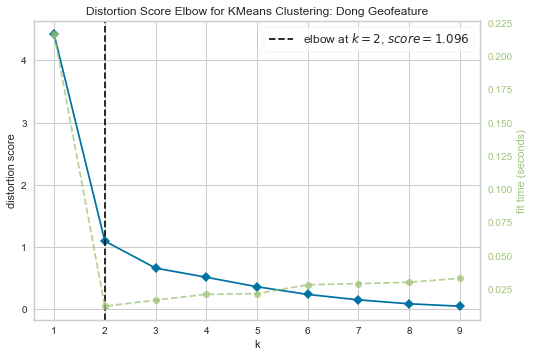

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Geofeature'}, xlabel='k', ylabel='distortion score'>

In [8]:
## 1. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-1. 행정동 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_geofeature_data = dong_feature.iloc[:,4:7].values

dong_geofeature_data = MinMaxScaler().fit_transform(dong_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Geofeature")
visualizer.fit(dong_geofeature_data)
visualizer.show()

In [9]:
# 뽑힌 k로 clustering 진행 - dong- geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 2

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_geofeature_data)

# 결과 저장
dong_feature["dong_cluster_geo"] = model.fit_predict(dong_geofeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_geo"]))


print(dong_feature[dong_feature["dong_cluster_geo"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_geo"] == 1]["행정동"].values)
#print(dong_feature[dong_feature["dong_cluster_geo"] == 2]["행정동"].values)

Counter({0: 10, 1: 5})
['청담동' '역삼2동' '역삼1동' '신사동' '삼성2동' '삼성1동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']


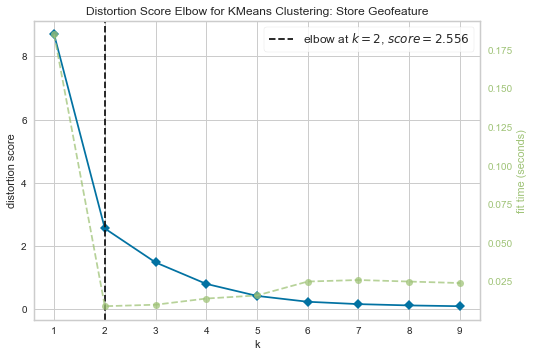

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Geofeature'}, xlabel='k', ylabel='distortion score'>

In [10]:
## 1. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 1-2. 매장 별 입지특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_geofeature_data = store_feature.iloc[:,4:7].values

store_geofeature_data = MinMaxScaler().fit_transform(store_geofeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Geofeature")
visualizer.fit(store_geofeature_data)
visualizer.show()

In [11]:
# 뽑힌 k로 clustering 진행 - store geofeature(3), 2 cluster
from sklearn.cluster import KMeans

k = 2

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_geofeature_data)

# 결과 저장
store_feature["store_cluster_geo"] = model.fit_predict(store_geofeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_geo"]))


print(store_feature[store_feature["store_cluster_geo"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_geo"] == 1]["행정동"].values)
#print(store_feature[store_feature["store_cluster_geo"] == 2]["매장명"].values)
#print(store_feature[store_feature["store_cluster_geo"] == 3]["매장명"].values)

Counter({0: 26, 1: 7})
['청담동' '일원1동' '역삼2동' '역삼1동' '역삼1동' '역삼1동' '신사동' '신사동' '신사동' '신사동' '수서동'
 '수서동' '세곡동' '삼성2동' '삼성2동' '삼성1동' '삼성1동' '대치4동' '대치2동' '대치2동' '대치1동'
 '논현2동' '논현2동' '논현2동' '논현1동' '개포2동']
['청담동' '역삼2동' '역삼1동' '역삼1동' '역삼1동' '대치4동' '대치4동']


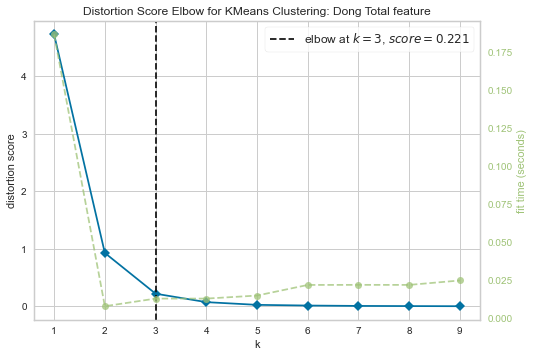

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Dong Total feature'}, xlabel='k', ylabel='distortion score'>

In [12]:
## 2. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2-1. 행정동 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
dong_totalfeature_data = dong_feature.iloc[:,[3,7]].values

dong_totalfeature_data = MinMaxScaler().fit_transform(dong_totalfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Dong Total feature")
visualizer.fit(dong_totalfeature_data)
visualizer.show()

In [13]:
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(dong_totalfeature_data)

# 결과 저장
dong_feature["dong_cluster_total"] = model.fit_predict(dong_totalfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(dong_feature["dong_cluster_total"]))


print(dong_feature[dong_feature["dong_cluster_total"] == 0]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total"] == 1]["행정동"].values)
print(dong_feature[dong_feature["dong_cluster_total"] == 2]["행정동"].values)

Counter({0: 8, 1: 5, 2: 2})
['청담동' '역삼2동' '신사동' '삼성2동' '대치4동' '대치2동' '논현2동' '논현1동']
['일원1동' '수서동' '세곡동' '대치1동' '개포2동']
['역삼1동' '삼성1동']


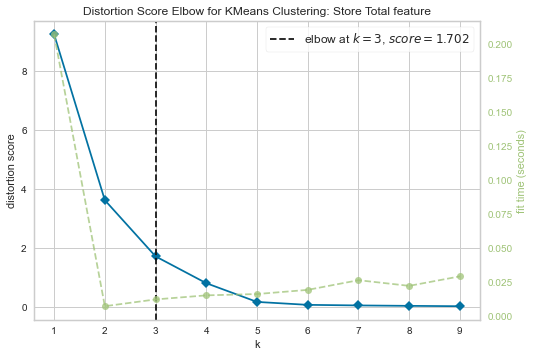

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering: Store Total feature'}, xlabel='k', ylabel='distortion score'>

In [15]:
## 2. 입지특성(문화·체육·휴양시설, 상업지역, 주거지역) + 인구 특성 clustering 진행
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

## 2-2. 점포 별 입지 + 인구특성 clustering 진행
# preprocessing 후 분산 확인
from sklearn.preprocessing import MinMaxScaler  # 표준화 패키지 라이브러리
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리  
store_totalfeature_data = store_feature.iloc[:,[3,7]].values

store_totalfeature_data = MinMaxScaler().fit_transform(store_totalfeature_data) # x객체에 x를 표준화한 데이터를 저장
#geofeature_data = StandardScaler().fit_transform(geofeature_data) # x객체에 x를 표준화한 데이터를 저장


# distortion score = Sum of squares of distances of points from cluster centers
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10), title="Distortion Score Elbow for KMeans Clustering: Store Total feature")
visualizer.fit(store_totalfeature_data)
visualizer.show()

In [16]:
# 뽑힌 k로 clustering 진행 - dong- Total feature(2), 3 cluster
from sklearn.cluster import KMeans

k = 3

# 모델 선언
model = KMeans(n_clusters = k, random_state=10)

# 데이터에 학습
model.fit(store_totalfeature_data)

# 결과 저장
store_feature["store_cluster_total"] = model.fit_predict(store_totalfeature_data)

# 기존 4 feature standard scaler 돌리고 k3으로 clustering 한 결과
from collections import Counter
print(Counter(store_feature["store_cluster_total"]))


print(store_feature[store_feature["store_cluster_total"] == 0]["행정동"].values)
print(store_feature[store_feature["store_cluster_total"] == 1]["행정동"].values)
print(store_feature[store_feature["store_cluster_total"] == 2]["행정동"].values)

Counter({1: 21, 2: 7, 0: 5})
['역삼1동' '역삼1동' '역삼1동' '삼성1동' '삼성1동']
['청담동' '일원1동' '역삼2동' '신사동' '신사동' '신사동' '신사동' '수서동' '수서동' '세곡동' '삼성2동'
 '삼성2동' '대치4동' '대치2동' '대치2동' '대치1동' '논현2동' '논현2동' '논현2동' '논현1동' '개포2동']
['청담동' '역삼2동' '역삼1동' '역삼1동' '역삼1동' '대치4동' '대치4동']


In [19]:
dong_feature

,행정동,면적(km^2),인구수,유동인구비율,동_문화·체육·휴양시설,동_상업지역,동_주거지역,dong_cluster_geo,dong_cluster_total
0,청담동,2.45,30014,1.42,0.045404,0.521318,0.433278,0,0
1,일원1동,0.92,16806,1.11,0.140781,0.243868,0.615351,1,1
2,역삼2동,1.15,36560,1.36,0.031786,0.471216,0.496998,0,0
3,역삼1동,2.65,35878,3.02,0.010595,0.611696,0.377709,0,2
4,신사동,1.89,17541,2.14,0.083859,0.568069,0.348072,0,0
5,수서동,1.43,16202,1.54,0.148923,0.341908,0.509169,1,1
6,세곡동,6.15,45160,0.94,0.081850,0.282990,0.635160,1,1
7,삼성2동,1.19,30291,1.29,0.024653,0.449894,0.525454,0,0
8,삼성1동,1.87,14811,3.02,0.024718,0.644026,0.331256,0,2
9,대치4동,0.79,20773,1.62,0.002936,0.511551,0.485514,0,0


In [17]:
store_feature

,매장명,행정동,인구당매출,유동인구비율,점포_문화·체육·휴양시설,점포_상업지역,점포_주거지역,store_cluster_geo,store_cluster_total
0,깐부치킨(청담자이점),청담동,1575.615,1.42,0.669139,0.307067,0.023793,1,2
1,(주)깐부 청담본점,청담동,2662.957,1.42,0.020672,0.401674,0.577653,0,1
2,깐부치킨(일원점),일원1동,1868.511,1.11,0.090701,0.202634,0.706666,0,1
3,깐부치킨(역삼디오빌점),역삼2동,1002.229,1.36,0.611439,0.387749,0.000812,1,2
4,깐부치킨(강남세브란스점),역삼2동,402.694,1.36,0.029224,0.285410,0.685366,0,1
5,깐부치킨(역삼초교점),역삼1동,399.284,3.02,0.008250,0.393659,0.598091,0,0
6,깐부치킨(역삼GS타워점),역삼1동,1402.823,3.02,0.612286,0.386447,0.001267,1,2
7,깐부치킨 역삼본점,역삼1동,1130.038,3.02,0.601307,0.396986,0.001708,1,2
8,깐부치킨(역삼럭키점),역삼1동,422.320,3.02,0.011219,0.306944,0.681837,0,0
9,깐부치킨(강남역플래티넘점),역삼1동,1544.066,3.02,0.027802,0.934253,0.037945,0,0


In [23]:
## plot 출력을 위한 결과 dataframe 제작
store_cluster = pd.merge(store_feature[["매장명","행정동","인구당매출","store_cluster_total"]], 
                           dong_feature[["행정동","dong_cluster_total"]], on="행정동", how="right")
store_cluster

,매장명,행정동,인구당매출,store_cluster_total,dong_cluster_total
0,깐부치킨(청담자이점),청담동,1575.615,2,0
1,(주)깐부 청담본점,청담동,2662.957,1,0
2,깐부치킨(일원점),일원1동,1868.511,1,1
3,깐부치킨(역삼디오빌점),역삼2동,1002.229,2,0
4,깐부치킨(강남세브란스점),역삼2동,402.694,1,0
5,깐부치킨(역삼초교점),역삼1동,399.284,0,2
6,깐부치킨(역삼GS타워점),역삼1동,1402.823,2,2
7,깐부치킨 역삼본점,역삼1동,1130.038,2,2
8,깐부치킨(역삼럭키점),역삼1동,422.320,0,2
9,깐부치킨(강남역플래티넘점),역삼1동,1544.066,0,2


In [24]:
## 결과 Plot
import matplotlib.pyplot as plt

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

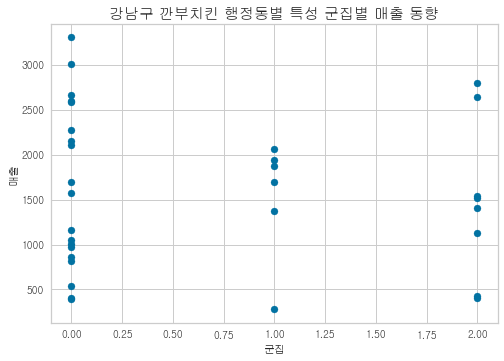

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

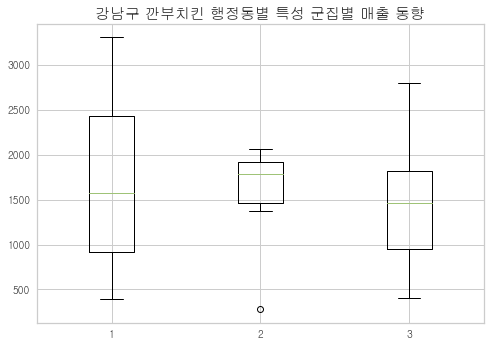

In [45]:
## 행정동별 feature 매출 동향
# 산점도
plt.scatter(store_cluster["dong_cluster_total"], store_cluster["인구당매출"])
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c1 = store_cluster[store_cluster["dong_cluster_total"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["dong_cluster_total"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["dong_cluster_total"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 행정동별 특성 군집별 매출 동향', fontsize=15)
plt.xticks(value, labels=["0","1","2"])
plt.show()

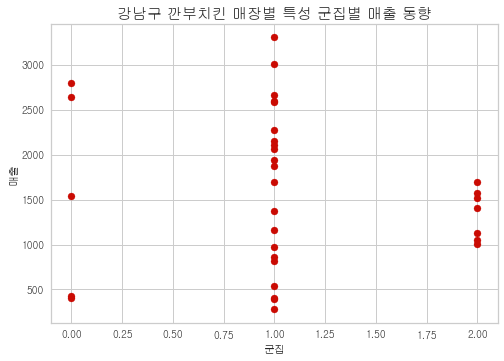

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

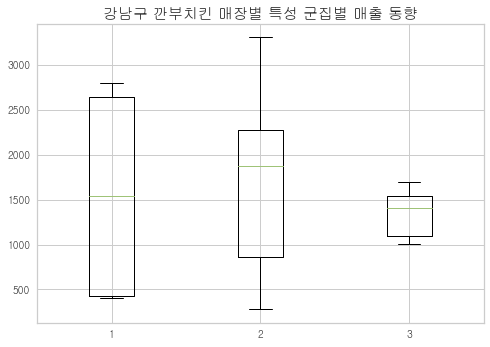

In [47]:
# 행정동별 feature 매출 동향
plt.scatter(store_cluster["store_cluster_total"], store_cluster["인구당매출"], color="r")
plt.title('강남구 깐부치킨 매장별 특성 군집별 매출 동향', fontsize=15)
#plt.xlabel("sepal_length")
plt.ylabel("매출")
plt.xlabel("군집")
plt.show()

# boxplot
c1 = store_cluster[store_cluster["store_cluster_total"] == 0]["인구당매출"].to_list()
c2 = store_cluster[store_cluster["store_cluster_total"] == 1]["인구당매출"].to_list()
c3 = store_cluster[store_cluster["store_cluster_total"] == 2]["인구당매출"].to_list()

value = [c1, c2, c3]
plt.boxplot(value) # vert: 가로/세로 상자그림
plt.title('강남구 깐부치킨 매장별 특성 군집별 매출 동향', fontsize=15)
plt.xticks(value, labels=["0","1","2"])
plt.show()